In [59]:
import matplotlib.pyplot as plt
import numpy as np 
import constants as const
from astropy.io import fits
import Annas_functions as anna
import pandas as pd
from astropy.modeling import models, fitting
from matplotlib.ticker import FormatStrFormatter
import os
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import astropy.units as u
import seaborn as sns
from spectral_cube import SpectralCube
from astropy.wcs import WCS

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Cambria'
plt.rcParams['font.size'] = 12

colors = sns.color_palette('colorblind', 10)

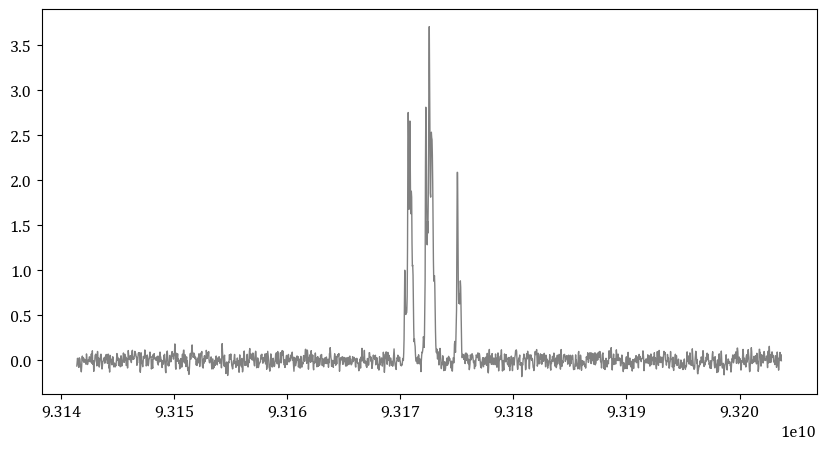

In [70]:
hdulist = fits.open(r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Thesis\data\i16293\Combined\tune_b\IRAS_16293-2422_b.spw16.fits")
header = hdulist[0].header

freq=(np.arange(header['NAXIS3'])-(header['CRPIX3']-1))*header['CDELT3']+header['CRVAL3']
theta_maj = header['BMAJ']*3600 #Major axis converted to arcsec
theta_min = header['BMIN']*3600 #Minor axis converted too arcsec

i,j = 88,74
intens = hdulist[0].data[0, :, j, i]  

plt.figure(figsize=(10,5))

data_cube = hdulist[0].data
header = hdulist[0].header
wcs = WCS(header, naxis=2)
cube = SpectralCube.read(hdulist)
f_n_min = 110.21
f_n_max = 110.22

slab_noise = cube.spectral_slab(f_n_min * u.GHz, f_n_max * u.GHz)
noise = slab_noise[:, i, j].value**2
channels = len(slab_noise.spectral_axis)
rms = np.sqrt(np.sum(noise) / channels)

plt.plot(cube.spectral_axis, cube[:, i, j], c='gray', lw=1, linestyle='-', label='Full spectrum')
plt.plot(slab_noise.spectral_axis, slab_noise[:, i, j], c='blue', lw=1, linestyle='--', label='Noise region')

In [78]:
file = r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Thesis\Copy of Splatalolgue results.xlsx'

transitions = {
    # "CH3CN 1": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 4)- 5( 4) F= 6- 5',  6.16e13),
    # "CH3CN 2": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 4)- 5( 4) F= 7- 6',  6.16e13),
    # "CH3CN 3": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 4)- 5( 4) F= 5- 4',  6.16e13),
    # "CH3CN 4": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 3)- 5(-3) F= 6- 5',  6.16e13),
    # "CH3CN 5": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6(-3)- 5( 3) F= 6- 5',  6.16e13),
    # "CH3CN 6": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6(-3)- 5( 3) F= 7- 6',  6.16e13),
    # "CH3CN 7": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 3)- 5(-3) F= 7- 6',  6.16e13),
    # "CH3CN 8": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 3)- 5(-3) F= 5- 4',  6.16e13),
    # "CH3CN 9": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6(-3)- 5( 3) F= 5- 4',  6.16e13),
    # "CH3CN 10": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 2)- 5( 2) F= 6- 6', 6.16e13),
    # "CH3CN 11": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 2)- 5( 2) F= 6- 5', 6.16e13),
    # "CH3CN 12": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 2)- 5( 2) F= 5- 4', 6.16e13),
    # "CH3CN 13": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 2)- 5( 2) F= 7- 6', 6.16e13),
    # "CH3CN 14": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 2)- 5( 2) F= 5- 5', 6.16e13),
    # "CH3CN 15": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 1)- 5( 1) F= 6- 6', 6.16e13),
    # "CH3CN 16": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 1)- 5( 1) F= 6- 5', 6.16e13),
    # "CH3CN 17": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 1)- 5( 1) F= 5- 4', 6.16e13),
    # "CH3CN 18": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 1)- 5( 1) F= 7- 6', 6.16e13),
    # "CH3CN 19": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 0)- 5( 0) F= 6- 6', 6.16e13),
    # "CH3CN 20": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 1)- 5( 1) F= 5- 5', 6.16e13),
    # "CH3CN 21": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 0)- 5( 0) F= 5- 4', 6.16e13),
    # "CH3CN 22": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 0)- 5( 0) F= 6- 5', 6.16e13),
    # "CH3CN 23": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 0)- 5( 0) F= 7- 6', 6.16e13),
    # "CH3CN 24": anna.read_excel(file, 'CDMS tune a', 'CH3CN', '6( 0)- 5( 0) F= 5- 5', 6.16e13),
    # "HC3N 1" : anna.read_excel(file, 'CDMS tune a', 'HC3N', 'J=12-11, F=12-12', 2.34e13),
    # "HC3N 2" : anna.read_excel(file, 'CDMS tune a', 'HC3N', 'J=12-11, F=11-10', 2.34e13),
    # "HC3N 3" : anna.read_excel(file, 'CDMS tune a', 'HC3N', 'J=12-11, F=12-11', 2.34e13),
    # "HC3N 4" : anna.read_excel(file, 'CDMS tune a', 'HC3N', 'J=12-11, F=13-12', 2.34e13),
    # "HC3N 5" : anna.read_excel(file, 'CDMS tune a', 'HC3N', 'J=12-11, F=11-11', 2.34e13)
    # "C18O" : anna.read_excel(file, 'CDMS tune a', 'C18O', '1 - 0 ', 5.4e16)
    # "13CO 1" : anna.read_excel(file, 'CDMS tune a', '13CO', 'J= 1- 0, F=1/2-1/2', 1.44e17),
    # "13CO 2" : anna.read_excel(file, 'CDMS tune a', '13CO', 'J= 1- 0, F=3/2-1/2', 1.44e17)
    # "HNCO 1" : anna.read_excel(file, 'CDMS tune a', 'HNCO', '5( 1, 5)- 4( 1, 4), F= 4- 4', 4.61e14),
    # "HNCO 2" : anna.read_excel(file, 'CDMS tune a', 'HNCO', '5( 1, 5)- 4( 1, 4), F= 6- 5', 4.61e14),
    # "HNCO 3" : anna.read_excel(file, 'CDMS tune a', 'HNCO', '5( 1, 5)- 4( 1, 4), F= 4- 3', 4.61e14),
    # "HNCO 4" : anna.read_excel(file, 'CDMS tune a', 'HNCO', '5( 1, 5)- 4( 1, 4), F= 5- 4', 4.61e14),
    # "HNCO 5" : anna.read_excel(file, 'CDMS tune a', 'HNCO', '5( 1, 5)- 4( 1, 4), F= 5- 5', 4.61e14)
    # "HNCO 1" : anna.read_excel(file, 'CDMS tune a', 'HNCO', '5( 0, 5)- 4( 0, 4), F= 4- 4', 4.61e14),
    # "HNCO 2" : anna.read_excel(file, 'CDMS tune a', 'HNCO', '5( 0, 5)- 4( 0, 4), F= 6- 5', 4.61e14),
    # "HNCO 3" : anna.read_excel(file, 'CDMS tune a', 'HNCO', '5( 0, 5)- 4( 0, 4), F= 5- 4', 4.61e14),
    # "HNCO 4" : anna.read_excel(file, 'CDMS tune a', 'HNCO', '5( 0, 5)- 4( 0, 4), F= 4- 3', 4.61e14),
    # "HNCO 5" : anna.read_excel(file, 'CDMS tune a', 'HNCO', '5( 0, 5)- 4( 0, 4), F= 5- 5', 4.61e14)
    # "N2H+ 1" : anna.read_excel(file, 'CDMS tune b', 'N2H+', 'J= 1- 0,F1= 1- 1,F= 0- 1',  6.01e13),
    # "N2H+ 2" : anna.read_excel(file, 'CDMS tune b', 'N2H+', 'J= 1- 0,F1= 1- 1,F= 2- 1',  6.01e13),
    # "N2H+ 3" : anna.read_excel(file, 'CDMS tune b', 'N2H+', 'J= 1- 0,F1= 1- 1,F= 2- 2',  6.01e13),
    # "N2H+ 4" : anna.read_excel(file, 'CDMS tune b', 'N2H+', 'J= 1- 0,F1= 1- 1,F= 1- 0',  6.01e13),
    # "N2H+ 5" : anna.read_excel(file, 'CDMS tune b', 'N2H+', 'J= 1- 0,F1= 1- 1,F= 1- 1',  6.01e13),
    # "N2H+ 6" : anna.read_excel(file, 'CDMS tune b', 'N2H+', 'J= 1- 0,F1= 1- 1,F= 1- 2',  6.01e13),
    # "N2H+ 7" : anna.read_excel(file, 'CDMS tune b', 'N2H+', 'J= 1- 0,F1= 2- 1,F= 2- 1',  6.01e13),
    # "N2H+ 8" : anna.read_excel(file, 'CDMS tune b', 'N2H+', 'J= 1- 0,F1= 2- 1,F= 2- 2',  6.01e13),
    # "N2H+ 9" : anna.read_excel(file, 'CDMS tune b', 'N2H+', 'J= 1- 0,F1= 2- 1,F= 3- 2',  6.01e13),
    # "N2H+ 10" : anna.read_excel(file, 'CDMS tune b', 'N2H+', 'J= 1- 0,F1= 2- 1,F= 1- 0', 6.01e13),
    # "N2H+ 11" : anna.read_excel(file, 'CDMS tune b', 'N2H+', 'J= 1- 0,F1= 2- 1,F= 1- 1', 6.01e13),
    # "N2H+ 12" : anna.read_excel(file, 'CDMS tune b', 'N2H+', 'J= 1- 0,F1= 2- 1,F= 1- 2', 6.01e13),
    "N2H+ 13" : anna.read_excel(file, 'CDMS tune b', 'N2H+', 'J= 1- 0,F1= 0- 1,F= 1- 0', 6.01e13),
    "N2H+ 14" : anna.read_excel(file, 'CDMS tune b', 'N2H+', 'J= 1- 0,F1= 0- 1,F= 1- 1', 6.01e13),
    "N2H+ 15" : anna.read_excel(file, 'CDMS tune b', 'N2H+', 'J= 1- 0,F1= 0- 1,F= 1- 2', 6.01e13)
    # "13CH3OH 1" : anna.read_excel(file, 'CDMS tune b', '13CH3OH', '2( -1, 2)- 1( -1, 1)',   3e13),
    # "13CH3OH 2" : anna.read_excel(file, 'CDMS tune b', '13CH3OH', '2( 0, 2)- 1( 0, 1) + +',   3e13),
    # "13CH3OH 3" : anna.read_excel(file, 'CDMS tune b', '13CH3OH', '2 ( 0 , 2)- 1 ( 0 , 1)', 3e13),
    # "13CH3OH 4" : anna.read_excel(file, 'CDMS tune b', '13CH3OH', '2 ( 1 , 1)- 1 ( 1 , 0)', 3e13)    
    # "CH3OH 1" : anna.read_excel(file, 'CDMS tune b', 'CH3OH', '2( 1, 2)- 1( 1, 1) E',   4e14),
    # "CH3OH 2" : anna.read_excel(file, 'CDMS tune b', 'CH3OH', '2( 0, 2)- 1( 0, 1) A',   4e14),
    # "CH3OH 3" : anna.read_excel(file, 'CDMS tune b', 'CH3OH', '2(- 0, 2)- 1(- 0, 1) E', 4e14),
    # "CH3OH 4" : anna.read_excel(file, 'CDMS tune b', 'CH3OH', '2(- 1, 1)- 1(- 1, 0) E', 4e14)
}


partitions = {
    "CH3CN": anna.read_partition(file,   'partition function', 'CH3CN'),
    "HC3N": anna.read_partition(file,    'partition function', 'HC3N'),
    "C18O": anna.read_partition(file,    'partition function', 'C18O'),
    "13CO": anna.read_partition(file,    'partition function', '13CO'),
    "HNCO": anna.read_partition(file,    'partition function', 'HNCO'),
    "N2H+": anna.read_partition(file,    'partition function', 'N2H+'),
    "CH3OCH3": anna.read_partition(file, 'partition function', 'CH3OCH3'),
    "13CH3OH": anna.read_partition(file, 'partition function', '13CH3OH'),
    "CH3OH": anna.read_partition(file,   'partition function', 'CH3OH'),
}

In [79]:
t_values = [2.725, 5, 9.375, 18.75, 37.5, 75, 150, 225, 300, 500, 1000, 2000]
q_values = {molecule: [partitions[molecule][f'Q({t}K)'] for t in t_values] for molecule in partitions}

molecule_name = "N2H+"
molecules_to_plot = [molecule_name]  # Add or remove molecule names as needed

filtered_q_values = {molecule: q_values[molecule] for molecule in molecules_to_plot if molecule in q_values}

# Convert to numpy arrays and filter out NaN values
filtered_q_values = {molecule: (np.array(vals, dtype=float), np.array(t_values, dtype=float)) for molecule, vals in filtered_q_values.items()}
filtered_q_values = {molecule: (vals[~np.isnan(vals)], temps[~np.isnan(vals)]) for molecule, (vals, temps) in filtered_q_values.items()}

def get_partition_function(molecule, temperature):
    if molecule not in q_values:
        raise ValueError(f"Molecule '{molecule}' not found in transitions.")
    
    q_vals = np.array(q_values[molecule], dtype=float)
    t_vals = np.array(t_values, dtype=float)
    
    # Filter out NaN values
    mask = ~np.isnan(q_vals)
    filtered_q_vals = q_vals[mask]
    filtered_t_vals = t_vals[mask]
    
    # Interpolate the partition function value for the given temperature
    partition_function_value = np.interp(temperature, filtered_t_vals, filtered_q_vals)
    
    return partition_function_value


Optically thin  with τ = 1.95e-02
Optically thin  with τ = 2.55e-02
Optically thin  with τ = 1.08e-01
0.152731529052082


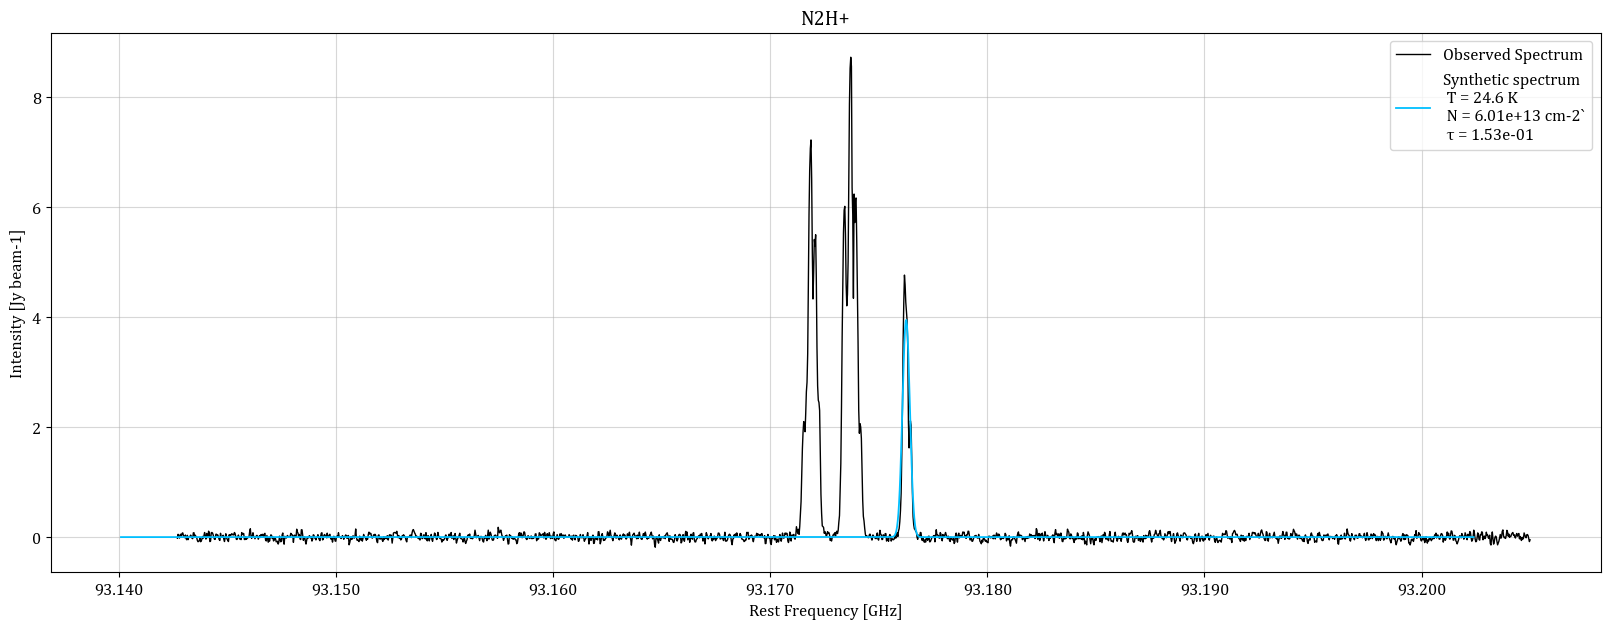

In [80]:
guess_temperature = 24.6
partition_function_value = get_partition_function(molecule_name, guess_temperature)

line_width = 0.0004  # Line width in GHz 
line_width_hz = line_width * 1.e9  # Line width in Hz
shift = 0.0013 # Shift in GHz
shift_hz = shift * 1.e9  # Shift in Hz

# Frequency range for the synthetic spectrum
freq_min = np.min(freq) - shift_hz # Minimum frequency in Hz (conv from kHz)
freq_max = np.max(freq) - shift_hz # Maximum frequency in Hz (conv from kHz)
num_points = len(freq)  # Number of frequency points

freq_syn = np.linspace(freq_min, freq_max, num_points)

# Initialize synthetic spectrum
synthetic_spectrum = np.zeros_like(freq_syn)
sum_tau = []
# Generate synthetic spectrum by summing Gaussian profiles
for transition, params in transitions.items():
    rest_freq = np.array(params["frequency"])*1.e9 #hz
    fwhm_velo = ((line_width_hz/rest_freq) * const.c_cm)
    Aul = np.array(params["Aul"])
    N = np.array(params["N"])
    gu = np.array(params["gu"])
    Eu = np.array(params["Eu"])
    Q = partition_function_value
    filling = 1

    tau_result = anna.tau(line_width_hz, N, gu, Q, Eu, Aul, rest_freq, guess_temperature) 
    
    if tau_result > 1:
        print(f"Optically thick  with τ = {tau_result:.2e}")
    else:
        print(f"Optically thin  with τ = {tau_result:.2e}")
    
        sum = sum_tau.append(tau_result)

all_tau = np.sum(sum_tau)
print(all_tau)        

for transition, params in transitions.items():
    rest_freq = np.array(params["frequency"])*1.e9 #hz
    fwhm_velo = ((line_width_hz/rest_freq) * const.c_cm)
    Aul = np.array(params["Aul"])
    N = np.array(params["N"])
    gu = np.array(params["gu"])
    Eu = np.array(params["Eu"])
    Q = partition_function_value
    filling = 1

    sigma = line_width_hz / 2.35
    w = anna.intensity(Aul, N, gu, Eu, guess_temperature, rest_freq, Q, all_tau, filling, theta_maj, theta_min)
    alpha = w / (fwhm_velo * 1.064)
    # print(fwhm_velo*1.e-5)
    synthetic_spectrum += anna.gaussian_profile(alpha, freq_syn, rest_freq, sigma)

plt.figure(figsize=(20, 7))
plt.plot(freq/1.e9 + shift, intens, label='Observed Spectrum', color='black', lw=1)
plt.plot(freq_syn/1.e9 , synthetic_spectrum, label='Synthetic spectrum\n' + ' T = ' + f'{guess_temperature} K\n' + ' N = ' + f'{N:.2e} cm-2`\n' + ' τ = ' + f'{all_tau:.2e}', color='deepskyblue', lw=1.3)


plt.title(params['name'])
plt.xlabel('Rest Frequency [GHz]')
plt.ylabel('Intensity [Jy beam-1]')
# plt.axvline(x=rest_freq/1.e9, color='red', linestyle='--', label='Rest Frequency')
plt.legend()

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3f'))  # Format with 3 decimals

plt.grid(alpha=0.5)
# plt.xlim(110.343, 110.39)
plt.xticks()
# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Thesis\results\i16293\synthetic_spectrum_hc3nspw18.pdf', dpi=200)
# plt.xlim(rest_freq/1.e9-0.01, rest_freq/1.e9+0.01)
plt.show()

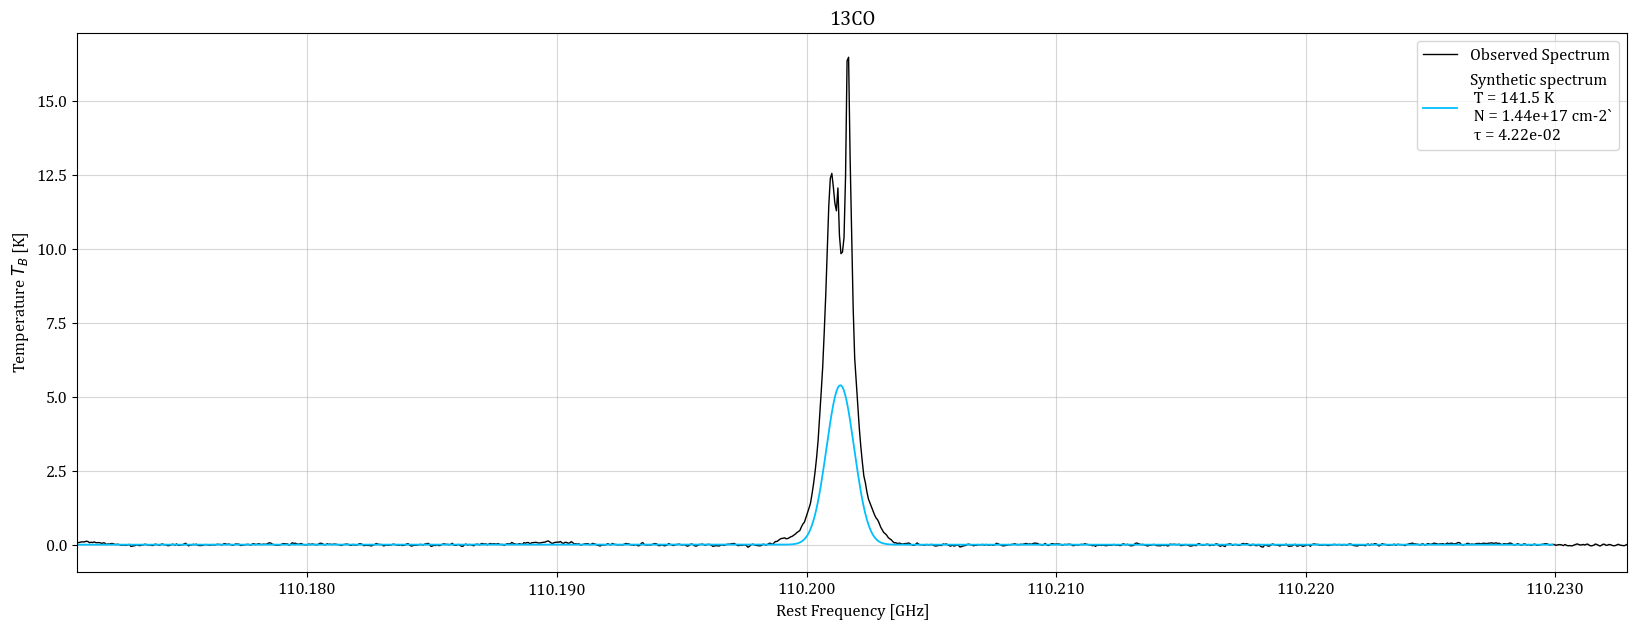

In [64]:
synthetic_spectrum = np.zeros_like(freq_syn)

# Generate synthetic spectrum by summing Gaussian profiles
for transition, params in transitions.items():
    rest_freq = np.array(params["frequency"])*1.e9 #hz
    fwhm_velo = (line_width_hz/rest_freq) * const.c_cm
    Aul = np.array(params["Aul"])
    N = np.array(params["N"])
    gu = np.array(params["gu"])
    Eu = np.array(params["Eu"])
    Q = partition_function_value
    filling = 1

    sigma = line_width_hz / 2.35
    w = anna.intensity_kelvin(Aul, N, gu, Eu, guess_temperature, rest_freq, Q, all_tau, filling)
    alpha = w / (fwhm_velo * 1.064 ) 
    synthetic_spectrum += anna.gaussian_profile(alpha, freq_syn, rest_freq, sigma)
plt.figure(figsize=(20, 7))

bright_temp = anna.temperature_conversion(intens, theta_maj, theta_min, freq)
plt.plot(freq/1.e9 + shift, bright_temp, label='Observed Spectrum', color='black', lw=1)
plt.plot(freq_syn/1.e9 , synthetic_spectrum, label='Synthetic spectrum\n' + ' T = ' + f'{guess_temperature} K\n' + ' N = ' + f'{N:.2e} cm-2`\n' + ' τ = ' + f'{all_tau:.2e}', color='deepskyblue', lw=1.3)

plt.title(params['name'])
plt.xlabel('Rest Frequency [GHz]')
plt.ylabel('Temperature $T_B$ [K]')
# plt.axvline(x=rest_freq/1.e9, color='red', linestyle='--', label='Rest Frequency')
plt.legend()

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3f'))  # Format with 3 decimals

plt.grid(alpha=0.5)
plt.xlim(np.min(freq/1.e9 + shift), np.max(freq/1.e9 + shift))
plt.xticks()
# plt.savefig(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Thesis\results\i16293\synthetic_spectrum_hc3nspw18.pdf', dpi=200)
# plt.xlim(rest_freq/1.e9-0.02, rest_freq/1.e9+0.02)
plt.show()

In [65]:
# line_width_hz = 0.001 * 1.e9
# fwhm = ((line_width_hz/rest_freq) * const.c_cm)
# N = 3.59e13
# gu = 25
# Q = get_partition_function('HC3N', 23.59)
# Eu = 34.05715
# Aul = 10**(-3.99469	)
# rest_freq = 109.173634   * 1.e9
# guess_temperature = 23.59
# Bul = (Aul * const.c_cm**3) / (8 * np.pi * const.h * rest_freq**3)
# delta_u = (line_width_hz / rest_freq) * const.c_cm
# Nu = (N/Q)*(gu*np.exp(-Eu/guess_temperature))
# test_tau = (const.h/delta_u)*Nu*Bul*(np.exp((const.h*rest_freq)/(const.k*guess_temperature))-1)
# print(test_tau)
# print(fwhm *1.e-5)

In [66]:
temperature_range = np.linspace(9, 150, 200)  # Input temperature range
partition_function_range = get_partition_function(molecule_name, temperature_range)  # Partition function range
density_range = np.logspace(10, 18, 200)  # Input density range

# Frequency range for the synthetic spectrum
freq_min = np.min(freq) - shift_hz # Minimum frequency in Hz (conv from kHz)
freq_max = np.max(freq) - shift_hz # Maximum frequency in Hz (conv from kHz)
num_points = len(freq)  # Number of frequency points

freq_syn = np.linspace(freq_min, freq_max, num_points)

# Initialize synthetic spectrum
synthetic_spectrum = np.zeros_like(freq_syn)

chi = []
temperature_all = []
density_all = []

for temperature in temperature_range:
    # plt.figure(figsize=(20, 7))
    # plt.plot(freq/1.e9 + shift, intens, label='Observed Spectrum', color='black', lw=1)
    # plt.xlim(rest_freq/1.e9-0.015, rest_freq/1.e9+0.015)
    temperature_all.append(temperature)
    partition = get_partition_function(molecule_name, temperature)
    combined_spectrum = np.zeros_like(freq_syn)  # Initialize combined spectrum for all lines

    for density in density_range:
        density_all.append(density)
        synthetic_spectrum = np.zeros_like(freq_syn)  # Initialize combined spectrum for all lines
        tau_all = []
        for transition, params in transitions.items():
            rest_freq = np.array(params["frequency"])*1.e9
            fwhm_velo = (line_width_hz /rest_freq) * const.c_cm
            Aul = np.array(params["Aul"])
            gu = np.array(params["gu"])
            Eu = np.array(params["Eu"])
            filling = 1
            Q = partition

            tau_result = anna.tau(line_width_hz, density, gu, Q, Eu, Aul, rest_freq, temperature)
            tau_all.append(tau_result)
            
        sum_tau = np.sum(tau_all)
        # print(f"Sum of tau values for T={temperature} K and N={density:.2e} cm⁻²: {sum_tau:.2e}")

        for transition, params in transitions.items():
            rest_freq = np.array(params["frequency"])*1.e9
            fwhm_velo = (line_width_hz /rest_freq) * const.c_cm
            Aul = np.array(params["Aul"])
            gu = np.array(params["gu"])
            Eu = np.array(params["Eu"])
            filling = 1
            Q = partition

            sigma = line_width_hz / 2.35  # Gaussian sigma
            w = anna.intensity(Aul, density, gu, Eu, temperature, rest_freq, Q, sum_tau, filling, theta_maj, theta_min)  # Intensity
            alpha_values = w / (fwhm_velo * 1.064)  # Alpha values
            
            synthetic_spectrum += anna.gaussian_profile(alpha_values, freq_syn, rest_freq, sigma)

        combined_spectrum += synthetic_spectrum

        mask = (freq/1.e9 + shift > (rest_freq/1.e9 - 0.003)) & (freq/1.e9 + shift < (rest_freq/1.e9 + 0.003))
        sp_freq = freq[mask] 
        # plt.axvline(np.min(sp_freq/1.e9) + shift , linestyle='--', color='blue')
        # plt.axvline(np.max(sp_freq/1.e9) + shift, linestyle='--', color='blue')
        sp_intens = intens[mask]
        # plt.plot(sp_freq/1.e9 + shift, sp_intens, color='blue', lw=1)
        synth_mask = (freq/1.e9 - shift> (rest_freq/1.e9 - 0.003)) & (freq/1.e9 - shift < (rest_freq/1.e9 + 0.003))
        chi_intensity = np.sum(sp_intens)
        chi_spectrum = np.sum(synthetic_spectrum[synth_mask])
        chi_value = ((chi_intensity - chi_spectrum)**2) / rms**2
        chi.append(chi_value)
        # plt.plot(freq_syn[synth_mask]/1.e9, synthetic_spectrum[synth_mask], label=f'N={density:.2e} cm⁻², tau = {tau_result:.2e}')
        # print(f'Chi value for T = {temperature} K and N = {density:.2e} cm⁻²: {chi_value:.2e}')
    # plt.title(params['name'] + f' T = {temperature} K')
    # plt.xlabel('Rest Frequency [GHz]')
    # plt.ylabel('Intensity [Jy beam-1]')
    # plt.legend()
    # plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3f'))  # Format with 3 decimals
    # plt.grid(alpha=0.5)
    # plt.xticks() 
print(np.nanmin(chi))

0.9414416853030748


Minimum chi value: 0.94 for T = 87.64824120603015 K and N = 2.49e+17 cm⁻²


Text(0, 0.5, 'Density [cm⁻²]')

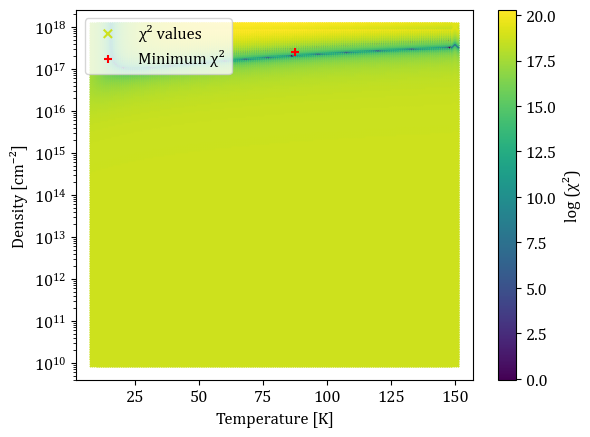

In [67]:
temp = pd.DataFrame(temperature_all)
dens = pd.DataFrame(density_all)

density_all = np.tile(density_range, len(temperature_range))
temperature_all = np.repeat(temperature_range, len(density_range))

og = pd.DataFrame({'Temperature': temperature_all, 'Density': density_all, 'Chi': chi})

minimum = og['Chi'].idxmin()
min_chi = og.loc[minimum, 'Chi']
min_chi_temperature = og.loc[minimum, 'Temperature']
min_chi_density = og.loc[minimum, 'Density']

print(f'Minimum chi value: {min_chi:.2f} for T = {min_chi_temperature} K and N = {min_chi_density:.2e} cm⁻²')

scatter = plt.scatter(temperature_all, density_all, c=np.log(chi), marker='x', label='χ² values')
plt.scatter(min_chi_temperature, min_chi_density, color='red', marker='+', label='Minimum χ²')
plt.yscale('log')
plt.colorbar(scatter, label='log (χ²)')
plt.legend(loc='upper left')
plt.xlabel('Temperature [K]')
plt.ylabel('Density [cm⁻²]')

Optically thin  with τ = 6.26e-02
Optically thin  with τ = 1.25e-01
0.18771139154185898


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5]),
 [Text(0, -2.5, '−2.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5')])

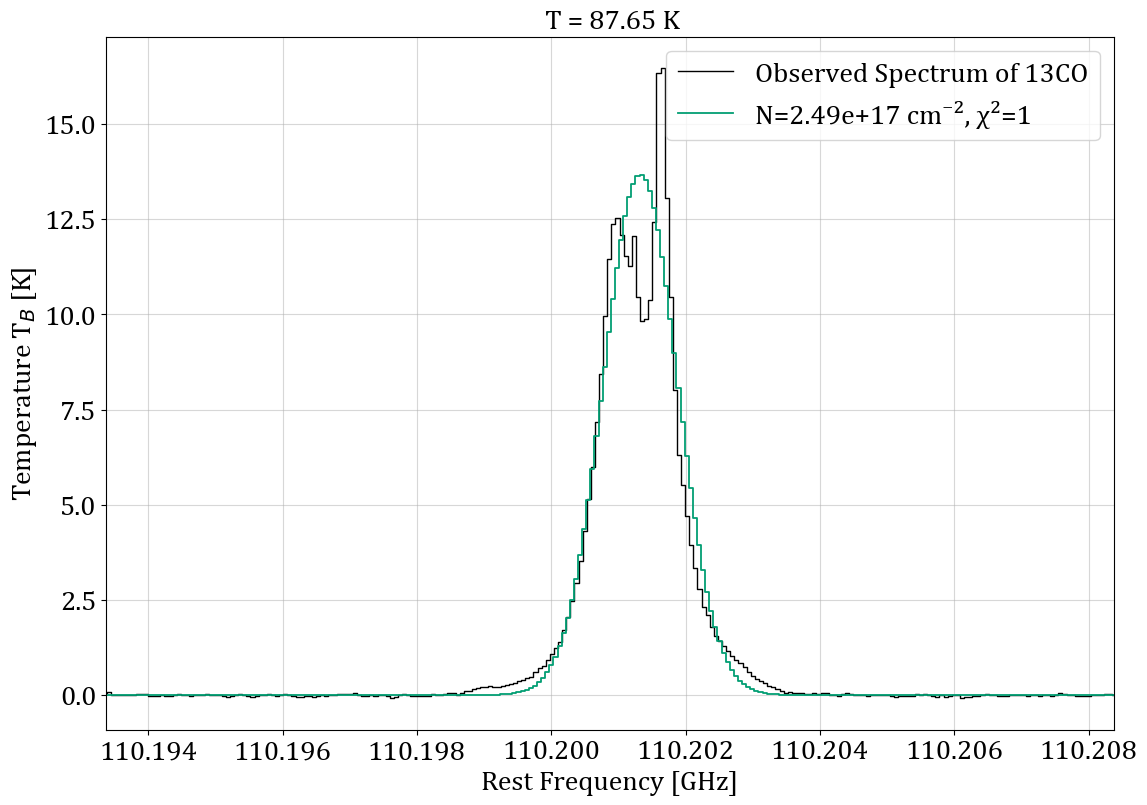

In [68]:
freq_min = np.min(freq) - shift_hz # Minimum frequency in Hz (conv from kHz)
freq_max = np.max(freq) - shift_hz # Maximum frequency in Hz (conv from kHz)
num_points = len(freq)  # Number of frequency points

freq_syn = np.linspace(freq_min, freq_max, num_points)

plt.figure(figsize=(13, 9))
btemp = anna.temperature_conversion(intens, theta_maj, theta_min, freq)
plt.step(freq/1.e9 + shift, btemp, label='Observed Spectrum of ' + params['name'], color='black', lw=1)
temperature = min_chi_temperature
density = min_chi_density
chi2 = min_chi
partition = get_partition_function(molecule_name, temperature)
    
synthetic_spectrum = np.zeros_like(freq_syn)
sum_tau = []

# Generate synthetic spectrum by summing Gaussian profiles
for transition, params in transitions.items():
    rest_freq = np.array(params["frequency"])*1.e9
    fwhm_velo = (line_width_hz /rest_freq) * const.c_cm
    Aul = np.array(params["Aul"])
    gu = np.array(params["gu"])
    Eu = np.array(params["Eu"])
    Q = partition
    filling = 1

    tau_result = anna.tau(line_width_hz, density, gu, Q, Eu, Aul, rest_freq, temperature)
    
    if tau_result > 1:
        print(f"Optically thick  with τ = {tau_result:.2e}")
    else:
        print(f"Optically thin  with τ = {tau_result:.2e}")
        
        sum = sum_tau.append(tau_result)

all_tau = np.sum(sum_tau)
print(all_tau)      

for transition, params in transitions.items():
    rest_freq = np.array(params["frequency"])*1.e9
    fwhm_velo = (line_width_hz /rest_freq) * const.c_cm
    Aul = np.array(params["Aul"])
    gu = np.array(params["gu"])
    Eu = np.array(params["Eu"])
    Q = partition
    filling = 1

    sigma = line_width_hz / 2.35
    w = anna.intensity_kelvin(Aul, density, gu, Eu, temperature, rest_freq, Q, all_tau, filling)
    alpha = w / (fwhm_velo * 1.064)
    synthetic_spectrum += anna.gaussian_profile(alpha, freq_syn, rest_freq, sigma)

plt.step(freq_syn / 1.e9, synthetic_spectrum, label=f'N={density:.2e} cm⁻², χ²={chi2:.0f}', color=colors[2], lw=1.3)
plt.title(f' T = {temperature:.2f} K', fontsize=20)
plt.xlabel('Rest Frequency [GHz]', fontsize=20)
plt.ylabel('Temperature T$_B$ [K]', fontsize=20)
plt.legend(fontsize=20)
plt.xlim(rest_freq/1.e9-0.008, rest_freq/1.e9+0.007)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3f'))  # Format with 3 decimals
plt.grid(alpha=0.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.savefig(r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Thesis\results\i16293\synthetic\synthetic_temp_hc3n.pdf", bbox_inches='tight', dpi=200)

In [69]:
Aij = []
Gu = []
eu = []

for transition, params in transitions.items():
    Aul = np.array(params["Aul"])
    gu = np.array(params["gu"])
    Eu = np.array(params["Eu"])
    Aij.append(Aul)
    Gu.append(gu)
    eu.append(Eu)

A1, A2, A3, A4 = Aij[0], Aij[1], Aij[2], Aij[3]
gu1, gu2, gu3, gu4 = Gu[0], Gu[1], Gu[2], Gu[3]
eu1, eu2, eu3, eu4 = eu[0], eu[1], eu[2], eu[3]

temp = anna.line_temperature(0.632, gu3, gu4, A3, A4, eu3, eu4)
print(temp)

IndexError: list index out of range